In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
#  Load data
dataset  = pd.read_csv('2008-01-02-LEH.N-bbo.csv', index_col = 0)
dataset.index = pd.DatetimeIndex(dataset.index)

difference_set = np.log(dataset).diff()
difference_set.head(10)

,bid-price,bid-volume,ask-price,ask-volume
time,,,,
2008-01-02 14:31:59.900999680,NaN,NaN,NaN,NaN
2008-01-02 14:31:59.900999680,0.000000,0.000000,0.0,-0.089612
2008-01-02 14:31:59.900999680,0.000000,0.875469,0.0,0.000000
2008-01-02 14:31:59.900999680,0.000000,0.000000,0.0,-0.015748
2008-01-02 14:31:59.900999680,0.000000,-0.875469,0.0,0.000000
2008-01-02 14:31:59.948000000,-0.000616,-0.916291,0.0,0.000000
2008-01-02 14:31:59.948000000,0.000770,-0.693147,0.0,0.000000
2008-01-02 14:31:59.948000000,-0.000770,0.693147,0.0,0.000000
2008-01-02 14:31:59.968999936,-0.000771,2.708050,0.0,0.000000


In [50]:
dataset.head(10)

,bid-price,bid-volume,ask-price,ask-volume
time,,,,
2008-01-02 14:31:59.900999680,64.95,5,65.0,70
2008-01-02 14:31:59.900999680,64.95,5,65.0,64
2008-01-02 14:31:59.900999680,64.95,12,65.0,64
2008-01-02 14:31:59.900999680,64.95,12,65.0,63
2008-01-02 14:31:59.900999680,64.95,5,65.0,63
2008-01-02 14:31:59.948000000,64.91,2,65.0,63
2008-01-02 14:31:59.948000000,64.96,1,65.0,63
2008-01-02 14:31:59.948000000,64.91,2,65.0,63
2008-01-02 14:31:59.968999936,64.86,30,65.0,63


In [51]:
dataset

,bid-price,bid-volume,ask-price,ask-volume
time,,,,
2008-01-02 14:31:59.900999680,64.95,5,65.00,70
2008-01-02 14:31:59.900999680,64.95,5,65.00,64
2008-01-02 14:31:59.900999680,64.95,12,65.00,64
2008-01-02 14:31:59.900999680,64.95,12,65.00,63
2008-01-02 14:31:59.900999680,64.95,5,65.00,63
...,...,...,...,...
2008-01-02 20:59:59.602999552,62.23,13,62.24,5
2008-01-02 20:59:59.668000000,62.23,33,62.24,5
2008-01-02 21:00:00.089000192,62.23,23,62.24,5


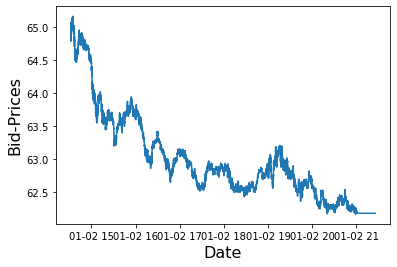

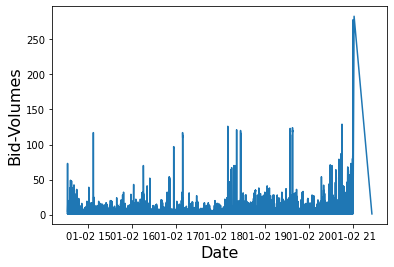

In [52]:
plt.figure(1)
plt.plot(dataset['bid-price'])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Bid-Prices', fontsize = 16)
plt.show()

plt.figure(2)
plt.plot(dataset['bid-volume'])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Bid-Volumes', fontsize = 16)
plt.show()

In [53]:
price_b_var = difference_set['bid-price']
volume_b_var = difference_set['bid-volume']

In [54]:
price_b_var =price_b_var[(price_b_var !=0)]
volume_b_var =volume_b_var[volume_b_var !=0]

price_b_var = price_b_var.iloc[1:]
volume_b_var = volume_b_var.iloc[1:]

In [55]:
price_b_var  = price_b_var[~price_b_var.index.duplicated(keep = 'last')]
volume_b_var  = volume_b_var[~volume_b_var.index.duplicated(keep = 'last')]

In [56]:
data = pd.concat([price_b_var, volume_b_var], axis = 1)

In [57]:
data = data.ffill(axis = 0)
data

,bid-price,bid-volume
time,,
2008-01-02 14:31:59.900999680,NaN,-0.875469
2008-01-02 14:31:59.948000000,-0.000770,0.693147
2008-01-02 14:31:59.968999936,-0.000771,2.708050
2008-01-02 14:32:00.036000000,-0.000154,-0.836248
2008-01-02 14:32:00.086000384,0.000771,-1.178655
...,...,...
2008-01-02 20:59:59.602999552,0.000643,0.167054
2008-01-02 20:59:59.668000000,0.000643,0.931558
2008-01-02 21:00:00.089000192,0.000643,-0.361013


In [58]:
data_price = data.loc[price_b_var.index].iloc[1:]
data_price['Return'] = data_price['bid-price']
data_price['Bid Volume Variation'] = data_price['bid-volume']
price_b_var[~price_b_var.index.duplicated(keep = 'last')]
data_price['Bid Volume'] = dataset['bid-volume'][~dataset.index.duplicated(keep = 'last')]
data_price['Ask Price'] = dataset['ask-price'][~dataset.index.duplicated(keep = 'last')]
data_price['Ask Volume'] = dataset['ask-volume'][~dataset.index.duplicated(keep = 'last')]
data_price['Bid Price'] = dataset['bid-price'][~dataset.index.duplicated(keep = 'last')]
del data_price['bid-price']
del data_price['bid-volume']
del data_price['Return']

df = data_price

del df['Bid Volume']
df

,Bid Volume Variation,Ask Price,Ask Volume,Bid Price
time,,,,
2008-01-02 14:31:59.968999936,2.708050,65.00,63,64.86
2008-01-02 14:32:00.036000000,-0.836248,65.00,60,64.85
2008-01-02 14:32:00.086000384,-1.178655,65.00,60,64.90
2008-01-02 14:32:00.100000256,1.178655,65.00,60,64.85
2008-01-02 14:32:00.734000384,-4.290459,64.95,1,64.80
...,...,...,...,...
2008-01-02 20:59:41.705000192,3.417727,62.21,1,62.19
2008-01-02 20:59:53.475000064,2.275556,62.24,1,62.18
2008-01-02 20:59:55.706000384,-1.938742,62.28,49,62.19


In [75]:
bid_price_array = np.array(df['Bid Price'])
bid_price_array


array([64.86, 64.85, 64.9 , ..., 62.19, 62.23, 62.18])

In [76]:
np.mean(bid_price_array) # population mean

63.143390018243416

In [77]:
np.std(bid_price_array) # population std

0.7045604413510109

We take a random sample from the population!

In [78]:
bid_price_array_sample = np.random.choice(bid_price_array, size = 1000)
sample_mean = np.mean(bid_price_array_sample)# sample mean
sample_mean


63.14517000000001

In [90]:
sample_std = np.std(bid_price_array_sample)# sample std
sample_std

0.7203272666642572

Step 3: bootstrap for 10,000 times

In [91]:
boot_means = []
for _ in range(10000):
    boot_sample = np.random.choice(bid_price_array_sample, replace = True, size = 1000) # take a random sample each iteration
    boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
    boot_means.append(boot_mean) # append the mean to boot_means
boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation

(boot_means_np)

boot_means_np

array([63.14377, 63.16772, 63.13391, ..., 63.18368, 63.18732, 63.11398])

step 4: analysis and interpretation

In [92]:
boot_means = np.mean(boot_means_np)# bootstrapped sample means
boot_means

63.145008603

In [93]:
np.mean(bid_price_array)# recall: true population mean

63.143390018243416

In [94]:
boot_std = np.std(boot_means_np) # bootstrapped std
boot_std

0.02313362766533581

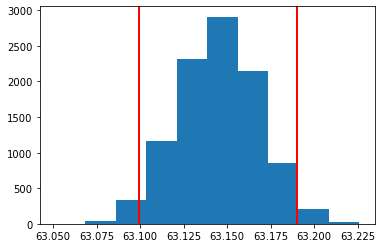

In [96]:
np.percentile(boot_means_np, [2.5,97.5])# 95% C.I.

plt.hist(boot_means_np, alpha = 1)
plt.axvline(np.percentile(boot_means_np,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(boot_means_np,97.5),color = 'red',linewidth=2)

## Bootstrap and Standard Errors
If you only know a median for a dataset of size 10, how do you calculate the standard error of the median?
Follow-up questions of bootstrap:

In [111]:
import numpy as np 
# step 0: generate a population distribution of 100 elements

pop = np.array(df['Bid Price'])

# step 1: take a random sample of size 10
sample_1= np.random.choice(pop,1000)
sample_1

array([64.49, 62.86, 62.56, 63.67, 63.73, 62.59, 63.29, 63.03, 63.07,
       62.4 , 65.  , 63.08, 64.66, 62.88, 62.9 , 62.97, 63.57, 62.83,
       63.04, 62.32, 62.61, 63.86, 64.97, 63.83, 63.17, 62.32, 64.83,
       62.86, 65.  , 62.19, 62.3 , 62.57, 63.15, 64.8 , 62.67, 63.12,
       63.82, 62.97, 63.02, 62.55, 64.88, 62.86, 64.74, 62.35, 62.77,
       62.68, 64.8 , 64.88, 62.24, 63.87, 62.93, 62.25, 63.51, 62.28,
       62.26, 62.52, 63.8 , 62.55, 62.86, 64.11, 62.58, 63.98, 63.93,
       63.1 , 63.6 , 63.67, 63.06, 62.29, 63.75, 65.05, 63.65, 63.06,
       62.57, 62.76, 63.4 , 62.79, 62.83, 62.51, 62.59, 63.95, 64.73,
       62.36, 63.08, 63.58, 62.54, 62.38, 63.92, 62.56, 63.63, 62.77,
       63.08, 62.31, 63.69, 62.95, 62.48, 63.97, 62.87, 64.86, 63.41,
       62.56, 62.73, 62.85, 63.5 , 62.54, 62.33, 62.23, 62.63, 62.27,
       63.61, 63.04, 62.54, 62.68, 62.52, 63.71, 62.38, 62.57, 62.59,
       64.96, 62.96, 63.73, 62.72, 63.65, 63.71, 63.27, 62.26, 63.25,
       62.56, 63.14,

In [112]:
def median_value(some):
    
    n = len(some)
    
    some.sort()
    
    if n % 2 == 0: 
        median1 = some[n//2]
        median2 = some[n//2-1]
        median = (median1+median2)/2
    
    else: 
        median = some[n//2]
        
    return median 

In [113]:
median_value(sample_1)

62.94

In [118]:
# step 3: repeatedly sample from the sample (sample_1) with replacement with the same sample size, aka. bootstrap

boot_sample_medians = []

for i in range(10000):
    
    boot_sample = np.random.choice(sample_1,replace = True, size = 1000)
    
    boot_median = median_value(boot_sample)
    
    boot_sample_medians.append(boot_median)

In [119]:
# step 4: stand error and confidence interval  
# std
np.std(boot_sample_medians)

0.019750643027506763

In [120]:
sum(boot_sample_medians)/len(boot_sample_medians) # the mean value of repeated samples' median values

62.940109999999486

In [121]:
# C.I.
# wide CI for small sample sizes, b/c of limited sampling possibilities and large variation
boot_median_CI = np.percentile(boot_sample_medians, [2.5,97.5])
boot_median_CI

array([62.905, 62.98 ])